<a href="https://colab.research.google.com/github/Koustav-Mandal/PRODIGY_ML_02/blob/main/ProdigyInfoTech2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading data
data = pd.read_csv("Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Shape of dataset
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Statistical analysis
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#Checking for missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#Checking for duplicates
data.duplicated().sum()

0

**Exploratory Data Analysis**

In [ ]:
#Distribution of Gender
data.Gender.value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

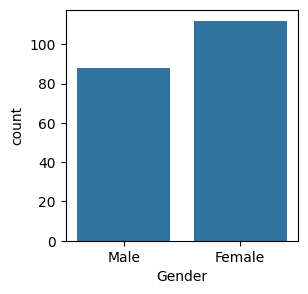

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x="Gender", data=data)
plt.show()

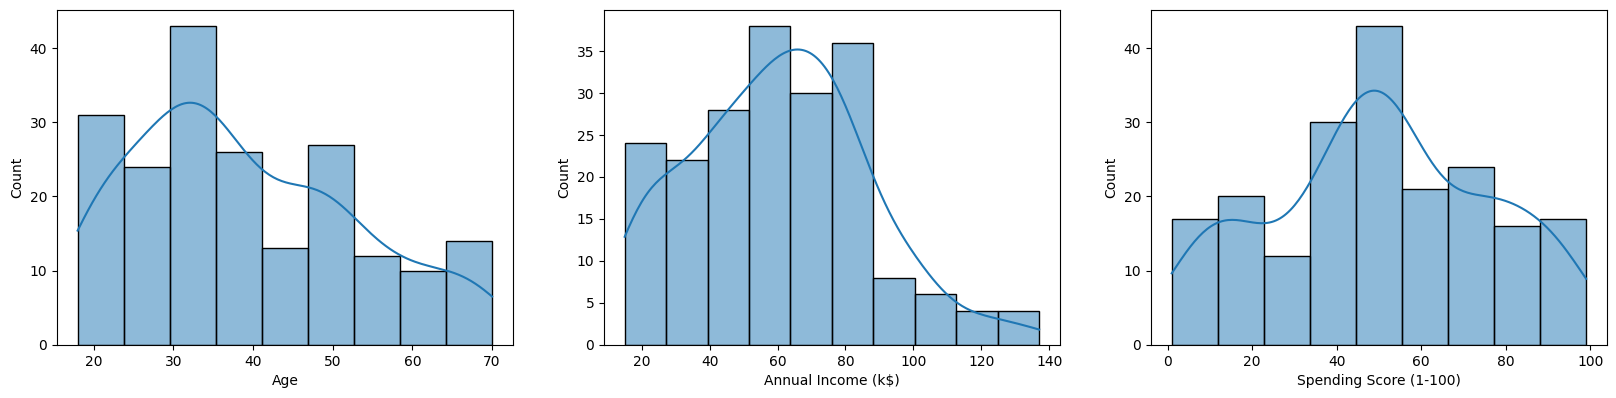

In [ ]:
#Distribution of numerical columns
cols = ["Age","Annual Income (k$)","Spending Score (1-100)"]

plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(4,3,i+1)
    sns.histplot(data[cols].iloc[:,i], kde= True)

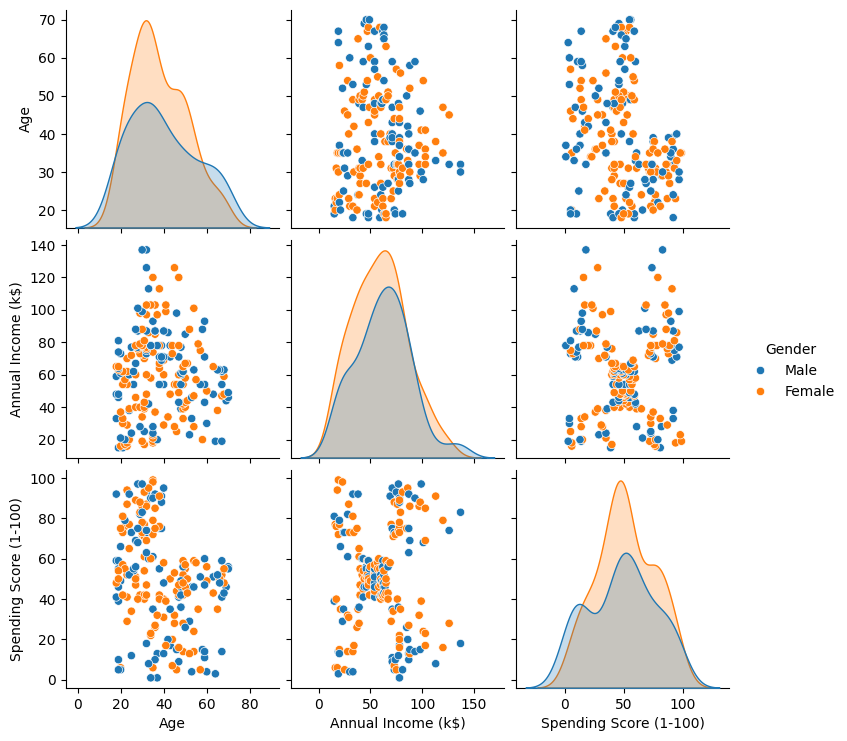

In [ ]:
#Pairplot
sns.pairplot(data[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]], diag_kind="kde", hue="Gender")
plt.show()

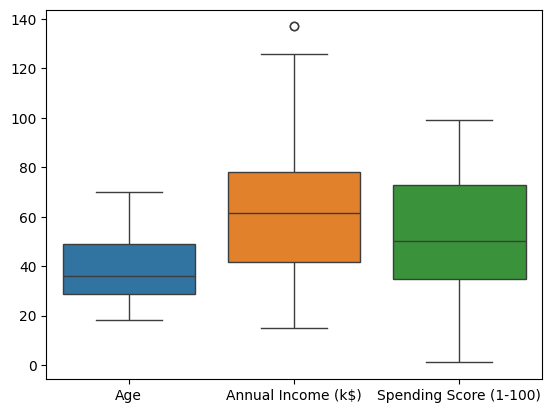

In [ ]:
#Checking Outliers
sns.boxplot(data = data[cols])
plt.show()

In [ ]:
#Investigating outlier in "Annual Income" column
data[data["Annual Income (k$)"] > 120]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
#Creating a copy of original data
data_copy = data.copy()

**Encoding**

In [ ]:
#Encoding Gender column, Female =0 and Male =1
data.Gender.replace(["Male", "Female"], [1,0], inplace=True)

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


**Model Building - K Means Clustering**

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [ ]:
data['cluster'] = kmeans.labels_

In [ ]:
#silhouette score
m = kmeans.fit_predict(data)
silhouette = silhouette_score(data, m)
print("The Silhouette Score for 2 clusters is :", silhouette)

The Silhouette Score for 2 clusters is : 0.4793398715941059


In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,1
197,198,1,32,126,74,1
198,199,1,32,137,18,1


**K value**

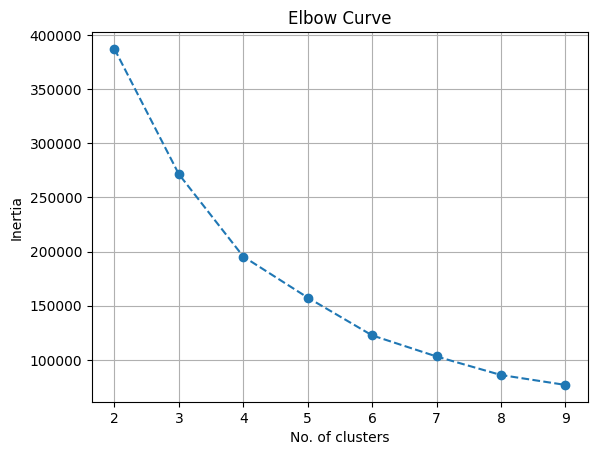

In [ ]:
inertia = list()
for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(data)
    inertia.append(km.inertia_)

plt.plot(range(2,10), inertia, "o--")
plt.grid()
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

For clusters = 2 , The Silhouette_score is : 0.3944
For clusters = 3 , The Silhouette_score is : 0.395
For clusters = 4 , The Silhouette_score is : 0.3986
For clusters = 5 , The Silhouette_score is : 0.4
For clusters = 6 , The Silhouette_score is : 0.38
For clusters = 7 , The Silhouette_score is : 0.4007
For clusters = 8 , The Silhouette_score is : 0.3951
For clusters = 9 , The Silhouette_score is : 0.3916


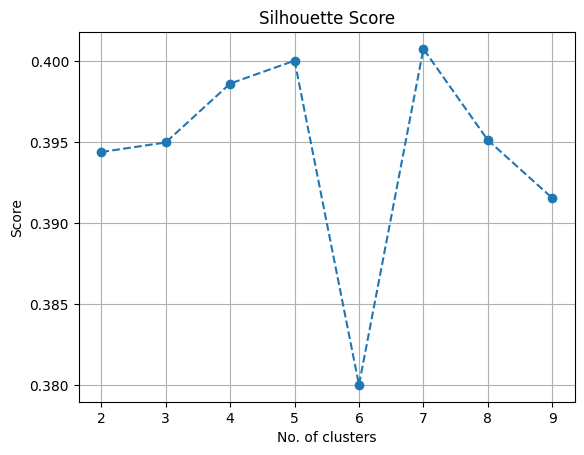

In [ ]:
score = list()
for k in range(2,10):
    #score.append(silhouette_score(data,km.labels_))
    m = km.fit_predict(data)
    score.append(silhouette_score(data,m))
    print("For clusters =", k , ", The Silhouette_score is :", round(score[k-2],4))

plt.plot(range(2,10), score, "o--")
plt.grid()
plt.xlabel('No. of clusters')
plt.ylabel('Score')
plt.title('Silhouette Score')
plt.show()

In [ ]:
km_optimum = KMeans(n_clusters=3)
km_optimum.fit(data)

KMeans(n_clusters=3)

In [ ]:
data['cluster'] = km_optimum.labels_

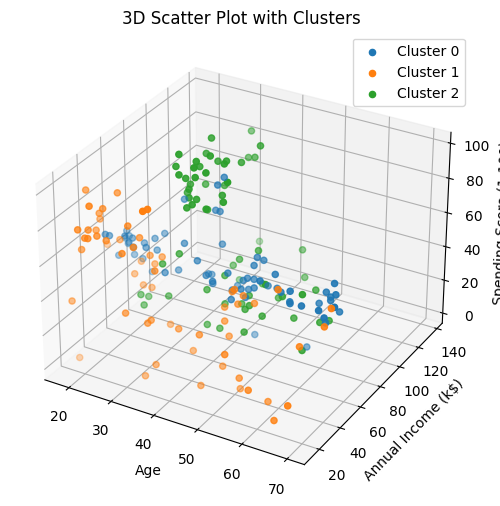

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(3):
    cluster_data = data[data['cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               label=f'Cluster {cluster}')

# Customize the plot
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot with Clusters')
ax.legend()
plt.show()

In [ ]:
km_optimum_5 = KMeans(n_clusters=5)
km_optimum_5.fit(data)
data['cluster'] = km_optimum_5.labels_

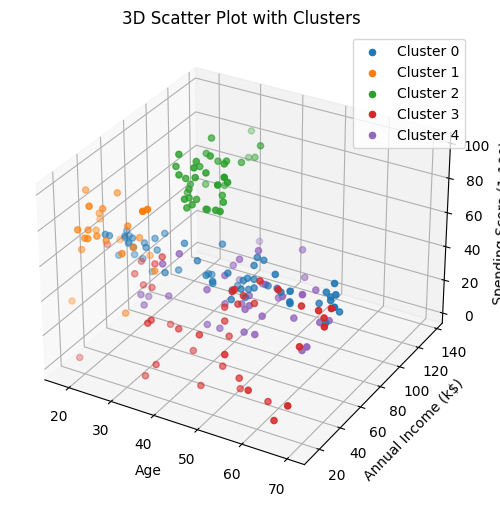

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(5):
    cluster_data = data[data['cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               label=f'Cluster {cluster}')

# Customize the plot
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot with Clusters')
ax.legend()
plt.show()